In [6]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx
from shapely.geometry import Point

Reading Spatial Data

In [7]:
# saving neighborhood tabulation areas (nta) file link as 'path'
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

# sanity check
print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [8]:
# saving school points shapefile link as 'path'
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path) 

# sanity check
print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,b'15K001 \xa0\xa0\xa0\xa0\xa0',K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,b'17K002 \xa0\xa0\xa0\xa0\xa0',K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,b'21K095 \xa0\xa0\xa0\xa0\xa0',K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,b'21K096 \xa0\xa0\xa0\xa0\xa0',K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,b'21K097 \xa0\xa0\xa0\xa0\xa0',K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


Writing Spatial Data

In [10]:
# Writing nta file to Shapefile foramt
nta_shape.to_file("nta_shape.shp", index=False)

# Writing nta file to GeoJSON format
nta_shape.to_file("nta_shape.geojson", driver='GeoJSON', index=False)

<ipython-input-10-dc28c7b1f1a6>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nta_shape.to_file("nta_shape.shp", index=False)


In [15]:
# returning the type of a column in our dataframe
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

Basic Attributes

In [16]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [17]:
# returns the object's Coordinate Reference System (CRS)
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
# changing the CRS to 2263
nta_shape = nta_shape.to_crs(epsg=2263)

nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
# returning the geometry column name of our dataframe
nta_shape.geometry.name

'geometry'

In [20]:
# returns the area of each geometry in our dataframe
(nta_shape
 .area
 .head()
)

0    7.741295e+07
1    8.246163e+07
2    8.208999e+07
3    1.471672e+07
4    1.800388e+07
dtype: float64

In [21]:
# returns the length of each geometry in our dataframe
(nta_shape
 .length
 .head()
)

0    45401.271303
1    36708.218997
2    43703.421679
3    18937.254355
4    18429.554579
dtype: float64

In [22]:
# returns the bounds of each geometry in our dataframe
(nta_shape
 .bounds
 .head()
)

,minx,miny,maxx,maxy
0,1.044355e+06,184845.847546,1.055350e+06,197904.544570
1,1.028591e+06,180690.523595,1.039416e+06,191431.566693
2,1.006464e+06,166079.738521,1.018348e+06,178005.554247
3,1.007222e+06,246205.578554,1.013128e+06,251177.316970
4,1.019252e+06,210706.938491,1.024941e+06,215596.863005


In [23]:
# returns the values for the bounds of the series as a whole
nta_shape.total_bounds

array([ 913174.90970924,  120131.4602932 , 1067382.17172758,
        272847.44352011])

In [24]:
# returning the type of geometries
(nta_shape
 .geom_type
 .head()
)

0         Polygon
1         Polygon
2    MultiPolygon
3         Polygon
4         Polygon
dtype: object

In [25]:
# returning valid geometry
(nta_shape
 .is_valid
 .head()
)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [26]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path) 

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,b'15K001 \xa0\xa0\xa0\xa0\xa0',K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,b'17K002 \xa0\xa0\xa0\xa0\xa0',K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,b'21K095 \xa0\xa0\xa0\xa0\xa0',K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,b'21K096 \xa0\xa0\xa0\xa0\xa0',K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,b'21K097 \xa0\xa0\xa0\xa0\xa0',K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


In [27]:
# returns the x-coordinate of each geometry
school_points['geometry'].x

0       9.809851e+05
1       9.977851e+05
2       9.912250e+05
3       9.884397e+05
4       9.882051e+05
            ...     
1704    1.000975e+06
1705    1.027677e+06
1706    1.008200e+06
1707    1.008240e+06
1708    1.006497e+06
Length: 1709, dtype: float64

In [28]:
# returns the y-coordinate of each geometry
school_points['geometry'].y

0       175780.758994
1       178431.910832
2       156323.361213
3       160709.992624
4       158329.591337
            ...      
1704    216289.828741
1705    251468.397826
1706    259137.236530
1707    259105.896860
1708    235553.859500
Length: 1709, dtype: float64

Basic Methods

In [29]:
# Met Museum coordinates
metmuseum = (
    gpd.GeoSeries(
        Point(-73.96381364165454, 40.77933770631253), crs=4326)
    .to_crs(school_points.crs)
)

# preview location
metmuseum

0    POINT (994271.786 223212.846)
dtype: geometry

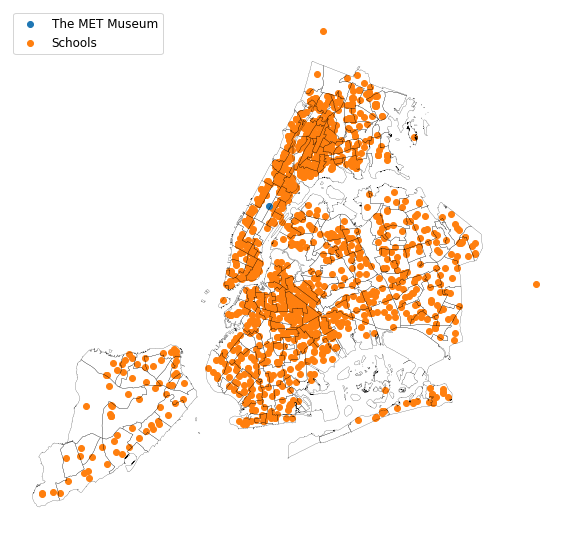

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

metmuseum.plot(ax=ax, label='The MET Museum')
school_points.plot(ax=ax, zorder=0, label='Schools')
nta_shape.plot(ax=ax, facecolor='None', linewidth=.2)

plt.legend(loc=2, fontsize='large')
ax.axis('off')
plt.tight_layout()

In [31]:
# distance of schools to MET Museum
school_points.distance(metmuseum[0])

0       49257.894040
1       44918.546026
2       66958.839427
3       62774.358790
4       65166.262284
            ...     
1704     9636.340643
1705    43752.255154
1706    38529.867837
1707    38515.153909
1708    17371.221171
Length: 1709, dtype: float64

In [32]:
# returns a centroid that is guaranteed to be within the geometry
(nta_shape
 .representative_point()
 .head()
)

0    POINT (1050079.414 191562.976)
1    POINT (1034034.975 186005.985)
2    POINT (1012065.910 172056.304)
3    POINT (1010526.391 248650.323)
4    POINT (1022144.735 213165.465)
dtype: geometry

In [33]:
# printing the current CRS of the nta
print("Old CRS: {}".format(nta_shape.crs))

# changing and printing the CRS to '4326'
print("New CRS: {}".format(nta_shape.to_crs(epsg=4326).crs))

Old CRS: epsg:2263
New CRS: epsg:4326


<AxesSubplot:>

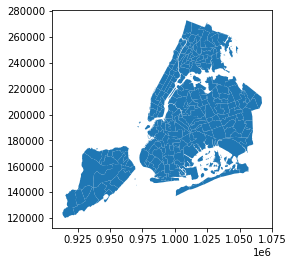

In [34]:
# plotting the geodataframe
nta_shape.plot()

<AxesSubplot:>

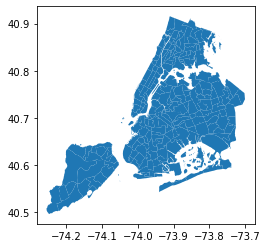

In [35]:
# changing the CRS and then plotting the geodataframe
(nta_shape
 .to_crs(epsg=4326)
 .plot()
)

Centroids from Polygons

<AxesSubplot:>

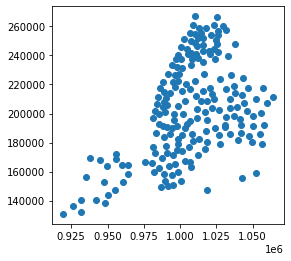

In [36]:
# returning the centroid of our shape and saving as a new column called 'centroid_column'
nta_shape['centroid_column'] = nta_shape.centroid

# setting our geometry as the new centroid column and then plotting 
(nta_shape
 .set_geometry('centroid_column')
 .plot()
)

Create a GeoDataFrame from a DataFrame with Coordinates

In [37]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [38]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
nta_shape['x'] = nta_shape.centroid.x
nta_shape['y'] = nta_shape.centroid.y
nta_shape_no_geometry = nta_shape.loc[:, ['NTAName', 'x', 'y']]

nta_shape_no_geometry.head()

<ipython-input-38-a8ed46e5dd56>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['x'] = nta_shape.centroid.x
<ipython-input-38-a8ed46e5dd56>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['y'] = nta_shape.centroid.y


,NTAName,x,y
0,St. Albans,-73.763147,40.691210
1,South Ozone Park,-73.819461,40.676164
2,Canarsie,-73.899752,40.638051
3,Mount Hope,-73.905123,40.849066
4,North Corona,-73.863038,40.752588


In [39]:
# Generate GeometryArray of point geometries from x, y coordinates
nta_shape_with_geometry = gpd.GeoDataFrame(
    nta_shape_no_geometry,
    geometry=gpd.points_from_xy(
        nta_shape_no_geometry['x'],
        nta_shape_no_geometry['y'])
)

# previewing our new point geometry column
nta_shape_with_geometry.head()

,NTAName,x,y,geometry
0,St. Albans,-73.763147,40.691210,POINT (-73.76315 40.69121)
1,South Ozone Park,-73.819461,40.676164,POINT (-73.81946 40.67616)
2,Canarsie,-73.899752,40.638051,POINT (-73.89975 40.63805)
3,Mount Hope,-73.905123,40.849066,POINT (-73.90512 40.84907)
4,North Corona,-73.863038,40.752588,POINT (-73.86304 40.75259)


<AxesSubplot:>

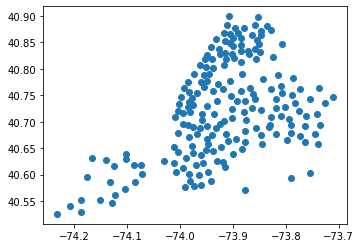

In [40]:
# plotting our data
nta_shape_with_geometry.plot()

Create Maps
GeoPandas has three basic classes of geometric objects.

Geometric Object (Points)

In [41]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path)

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,b'15K001 \xa0\xa0\xa0\xa0\xa0',K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,b'17K002 \xa0\xa0\xa0\xa0\xa0',K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,b'21K095 \xa0\xa0\xa0\xa0\xa0',K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,b'21K096 \xa0\xa0\xa0\xa0\xa0',K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,b'21K097 \xa0\xa0\xa0\xa0\xa0',K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


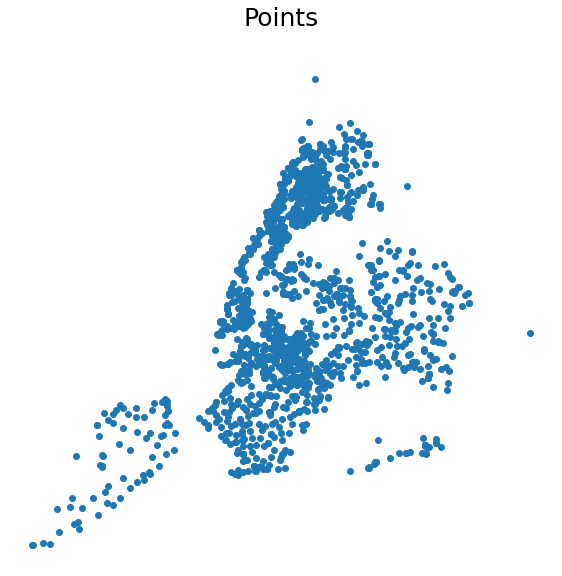

In [42]:
fig, ax = plt.subplots(figsize=(8, 8)) 

# converting to more accurate coordinate referance system
school_points = school_points.to_crs(epsg=2263)
school_points.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Points', pad=30, fontsize=25) # setting title as 'Points'
plt.axis('off') # turning off the plot axis
plt.tight_layout() # returing a tight layout of the plot

Lines

In [43]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

print('shape of data: {}'.format(streets.shape))
streets.head()

shape of data: (121325, 33)


,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,1,50,None,42.0,10280,51,None,PL,1222601917,None,...,C,1,TW,None,BATTERY PL,3,BATTERY,2007-11-29T00:00:00,64,"MULTILINESTRING ((-74.01793 40.70617, -74.0178..."
1,1,66,None,42.0,10280,65,None,PL,1222604562,None,...,C,1,TW,None,BATTERY PL,5,BATTERY,2007-11-29T00:00:00,82,"MULTILINESTRING ((-74.01757 40.70684, -74.0171..."
2,1,84,None,42.0,10280,83,None,PL,1222600933,None,...,C,1,TW,None,BATTERY PL,6,BATTERY,2007-11-29T00:00:00,98,"MULTILINESTRING ((-74.01712 40.70746, -74.0166..."
3,1,None,None,42.0,10280,None,None,PL,1222600931,None,...,C,1,TW,None,BATTERY PL,8,BATTERY,2007-11-29T00:00:00,None,"MULTILINESTRING ((-74.01694 40.70481, -74.0170..."
4,1,None,None,24.0,10004,None,None,PL,212262395,None,...,C,1,TF,None,BATTERY PL,14,BATTERY,2011-04-22T00:00:00,None,"MULTILINESTRING ((-74.01429 40.70455, -74.0143..."


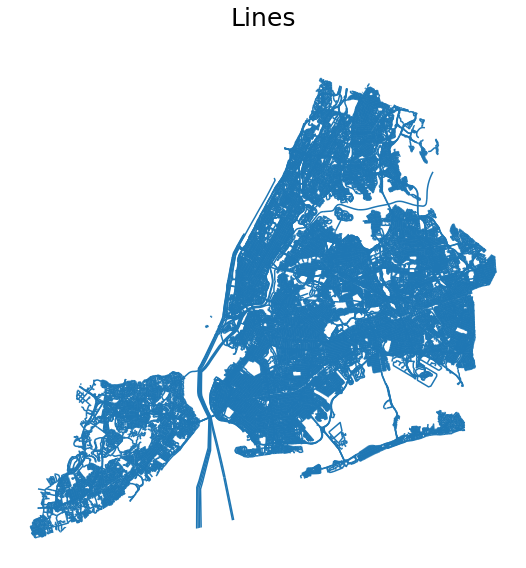

In [44]:
fig, ax = plt.subplots(figsize=(8, 8))

streets = streets.to_crs(epsg=2263) 
streets.plot(
    ax=ax, 
    color='#1f77b4'
)

ax.set_title('Lines', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

Polygons

In [46]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


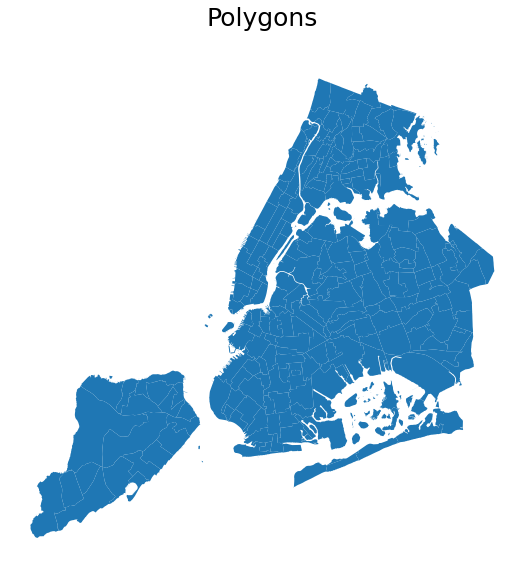

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.plot(
    ax=ax, 
    color='#1f77b4'
) 

ax.set_title('Polygons', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

Create Maps with Layers

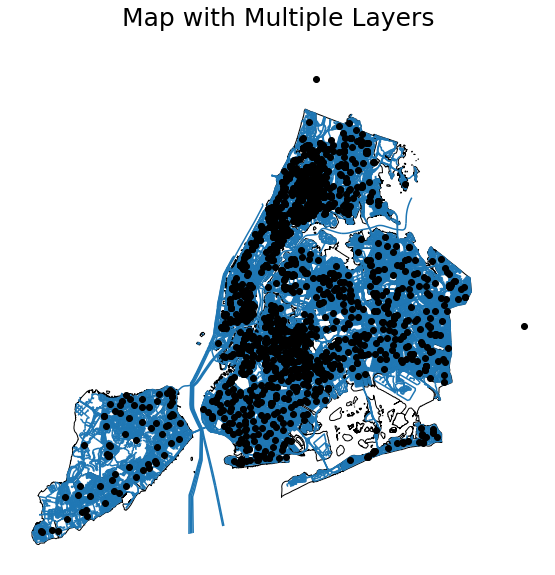

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

streets.plot(
    ax=ax, 
    zorder=1
)

school_points.plot(
    ax=ax, 
    color='black', 
    zorder=1
)

ax.set_title('Map with Multiple Layers', pad=30, fontsize=25)
plt.axis('off')
plt.tight_layout()

Add Background Map

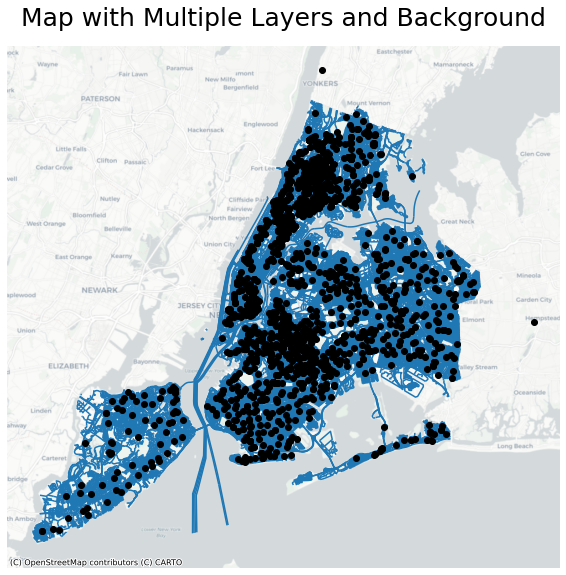

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))

source = ctx.providers.CartoDB.Positron

nta_shape.plot(
    ax=ax, 
    color='white', 
    edgecolor='black', 
    zorder=0
)

streets.plot(
    ax=ax, 
    zorder=1
)

school_points.plot(
    ax=ax, 
    color='black', 
    zorder=2
)

# adding basemap
ctx.add_basemap(
    ax, 
    crs=2263, 
    source=source
)

ax.set_title(
    'Map with Multiple Layers and Background',
    pad=20, fontsize=25
)
plt.axis('off')
plt.tight_layout()

Clip Data the school points

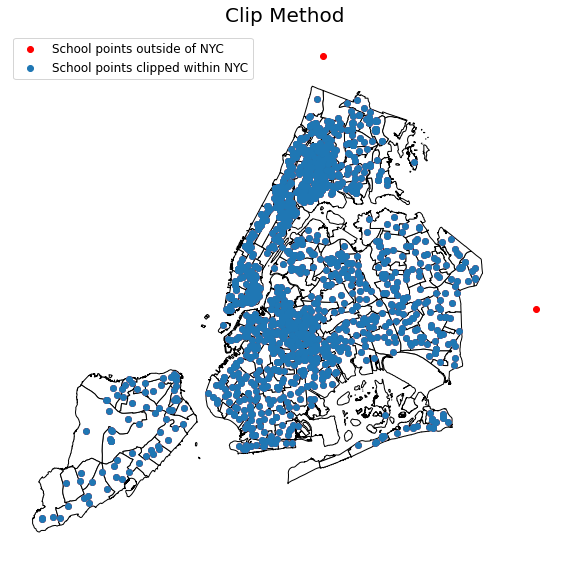

In [50]:
# clipping the school points that only fall within the nta shapes
school_points_clipped = gpd.clip(
    school_points,
    nta_shape
)

fig, ax = plt.subplots(figsize=(8, 8))

nta_shape.plot(
    ax=ax, 
    color="white", 
    edgecolor='black', 
    zorder=0
)

# plotting all points
school_points.plot(
    ax=ax, 
    color='red', 
    zorder=1,
    label='School points outside of NYC'
)

# plotting only the clipped points
school_points_clipped.plot(
    ax=ax, 
    color='#1f77b4', 
    zorder=2, 
    label='School points clipped within NYC'
)

ax.set_title('Clip Method', pad=10, fontsize=20)
plt.legend(loc='upper left', fontsize=12)
plt.axis('off')
plt.tight_layout()



Attribute Join Data

In [51]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [52]:
# reading in population by nta data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print('shape of data: {}'.format(nyc_pop.shape))
nyc_pop.head()

shape of data: (390, 6)


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [53]:
print('years: {}'.format(nyc_pop['Year'].unique()))

# only saving data from year 2010; dropping year 2000 records
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print('select one year: {}'.format(nyc_pop['Year'].unique()))

years: [2000 2010]
select one year: [2010]


In [54]:
# merging our nta shape data with the population data
nta_with_pop = nta_shape.merge(
    nyc_pop, 
    left_on='NTACode', 
    right_on='NTA Code'
)

nta_with_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704...",Queens,2010,81,QN08,St. Albans,48593
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682...",Queens,2010,81,QN55,South Ozone Park,75878
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...",Brooklyn,2010,47,BK50,Canarsie,83693
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852...",Bronx,2010,5,BX41,Mount Hope,51807
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757...",Queens,2010,81,QN26,North Corona,52037


Spatial Join

In [55]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [56]:
path = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(path)

print('shape of data: {}'.format(school_points.shape))
school_points.head()

shape of data: (1709, 18)


,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,STATE_CODE,ZIP,PRINCIPAL,PRIN_PH,FAX,GRADES,City,geometry
0,b'15K001 \xa0\xa0\xa0\xa0\xa0',K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,NY,11220,Jennifer Eusanio,718-567-7661,718-567-9771,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (980985.054 175780.759)
1,b'17K002 \xa0\xa0\xa0\xa0\xa0',K,2.0,K002,M.S. 002,Junior High-Intermediate-Middle,1,17,17,655 PARKSIDE AVENUE,NY,11226,ADRIENNE SPENCER,718-462-6992,718-284-7717,"06,07,08,SE",BROOKLYN,POINT (997785.136 178431.911)
2,b'21K095 \xa0\xa0\xa0\xa0\xa0',K,2.0,K095,P.S. 095 THE GRAVESEND,K-8,1,21,21,345 VAN SICKLEN STREET,NY,11223,Janet Ndzibah,718-449-5050,718-449-3047,"PK,0K,01,02,03,04,05,06,07,08,SE",BROOKLYN,POINT (991224.983 156323.361)
3,b'21K096 \xa0\xa0\xa0\xa0\xa0',K,2.0,K096,I.S. 096 SETH LOW,Junior High-Intermediate-Middle,1,21,21,99 AVENUE P,NY,11204,Denise Sandra Levinsky,718-236-1344,718-236-2397,"06,07,08,SE",BROOKLYN,POINT (988439.681 160709.993)
4,b'21K097 \xa0\xa0\xa0\xa0\xa0',K,2.0,K097,P.S. 97 THE HIGHLAWN,Elementary,1,21,21,1855 STILLWELL AVENUE,NY,11223,KRISTINE MUSTILLO,718-372-7393,718-372-3842,"PK,0K,01,02,03,04,05,SE",BROOKLYN,POINT (988205.073 158329.591)


In [57]:
# identifying the CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
# identifying the CRS
school_points.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [59]:
# changing CRS so they both match
nta_shape = nta_shape.to_crs(school_points.crs)
nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [60]:
# spatial join nta data to the school points data with operation = 'intersects'
school_points_with_nta = gpd.sjoin(
    school_points,
    nta_shape, 
    how="inner", 
    op='intersects'
)

school_points_with_nta.head()

,ATS_CODE,BORO,BORONUM,LOC_CODE,SCHOOLNAME,SCH_TYPE,MANAGED_BY,GEO_DISTRI,ADMIN_DIST,ADDRESS,...,geometry,index_right,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length
0,b'15K001 \xa0\xa0\xa0\xa0\xa0',K,2.0,K001,P.S. 001 THE BERGEN,Elementary,1,15,15,309 47 STREET,...,POINT (980985.054 175780.759),163,164,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.11251
36,b'15K136 \xa0\xa0\xa0\xa0\xa0',K,2.0,K136,I.S. 136 CHARLES O. DEWEY,Junior High-Intermediate-Middle,1,15,15,4004 4 AVENUE,...,POINT (982218.628 176813.496),163,164,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.11251
65,b'15K172 \xa0\xa0\xa0\xa0\xa0',K,2.0,K172,P.S. 172 BEACON SCHOOL OF EXCELLENCE,Elementary,1,15,15,825 4 AVENUE,...,POINT (984158.590 178921.890),163,164,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.11251
168,b'15K295 \xa0\xa0\xa0\xa0\xa0',K,2.0,K295,P.S. 295,Elementary,1,15,15,330 18 STREET,...,POINT (987330.493 180120.659),163,164,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.11251
222,b'75K371 \xa0\xa0\xa0\xa0\xa0',K,2.0,K371,P.S. 371 - LILLIAN L. RASHKIS,High school,1,15,75,355 37 STREET,...,POINT (982776.837 177607.547),163,164,3,Brooklyn,047,BK32,Sunset Park West,4.995550e+07,83039.11251


In [61]:
# number of schools per NTA top 20
(school_points_with_nta
 .groupby(by='NTAName')['ATS_CODE']
 .count()
 .sort_values(ascending=False)
 .head(20)
)

NTAName
Brownsville                                         30
Stuyvesant Heights                                  28
East Harlem South                                   28
East Concourse-Concourse Village                    27
Mott Haven-Port Morris                              27
Claremont-Bathgate                                  26
Central Harlem North-Polo Grounds                   25
Upper West Side                                     25
East New York                                       24
Lower East Side                                     24
Soundview-Castle Hill-Clason Point-Harding Park     23
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill    23
East Harlem North                                   22
Canarsie                                            22
Bedford                                             22
Crown Heights North                                 21
Bushwick South                                      20
Chinatown                                           19
Wa

In [62]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


<AxesSubplot:>

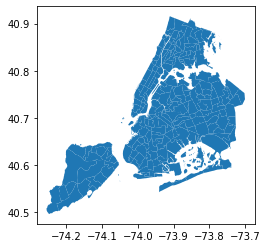

In [63]:
nta_shape.plot()

<AxesSubplot:>

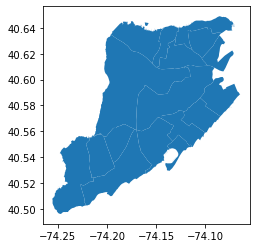

In [64]:
# slicing the nta data with everything up to lon = -74.1
(nta_shape
 .cx[:-74.1, :]
 .plot()
)

<AxesSubplot:>

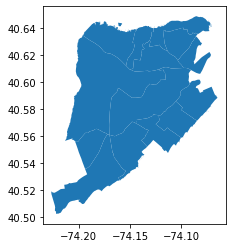

In [65]:
# slicing the nta data with everything up to lon = -74.1 and everything after lat = 40.56
(nta_shape
 .cx[:-74.1, 40.56:]
 .plot()
)

## Coordinate Reference Systems

In [66]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [67]:
# checking the current CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

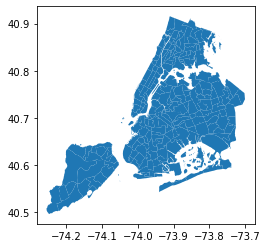

In [68]:
nta_shape.plot()

<AxesSubplot:>

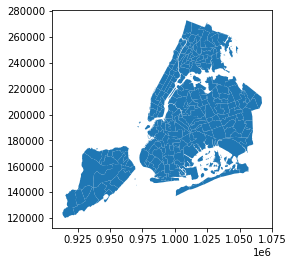

In [69]:
# switching CRS of nta to epsg = 2263
(nta_shape
 .to_crs(epsg=2263)
 .plot()
)

## Types of Maps

In [70]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

print(nyc_pop.shape)
nyc_pop.head()

(390, 6)


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,Bronx,2000,5,BX01,Claremont-Bathgate,28149
1,Bronx,2000,5,BX03,Eastchester-Edenwald-Baychester,35422
2,Bronx,2000,5,BX05,Bedford Park-Fordham North,55329
3,Bronx,2000,5,BX06,Belmont,25967
4,Bronx,2000,5,BX07,Bronxdale,34309


In [71]:
# saving only the population numbers for the year 2010
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

nyc_pop.head()

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538


In [72]:
path = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Neighborhood_Tabulation_Areas_2010\
/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
nta_shape = gpd.read_file(path)

print('shape of data: {}'.format(nta_shape.shape))
nta_shape.head()

shape of data: (195, 9)


,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704..."
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682..."
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ..."
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852..."
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757..."


In [73]:
# joining our nta population data to our nta shapes data
nta_pop = nta_shape.merge(
    nyc_pop,
    left_on='NTACode', 
    right_on='NTA Code', 
    how='inner'
)

nta_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((-73.75205 40.70524, -73.75175 40.704...",Queens,2010,81,QN08,St. Albans,48593
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((-73.80577 40.68294, -73.80552 40.682...",Queens,2010,81,QN55,South Ozone Park,75878
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((-73.88834 40.64672, -73.88835 ...",Brooklyn,2010,47,BK50,Canarsie,83693
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((-73.89561 40.85458, -73.89663 40.852...",Bronx,2010,5,BX41,Mount Hope,51807
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((-73.85450 40.75829, -73.85421 40.757...",Queens,2010,81,QN26,North Corona,52037


In [74]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [75]:
nta_pop = nta_pop.to_crs(epsg=2263)

nta_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [76]:
# returning the area of our nta as a new column 'sq_ft'
nta_pop['sq_ft'] = nta_pop.area

nta_pop.head()

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,sq_ft
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...",Queens,2010,81,QN08,St. Albans,48593,7.741295e+07
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...",Queens,2010,81,QN55,South Ozone Park,75878,8.246163e+07
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((1015235.757 174913.308, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,8.208999e+07
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((1013128.128 250640.950, 1012847.931 ...",Bronx,2010,5,BX41,Mount Hope,51807,1.471672e+07
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((1024559.818 215574.811, 1024639.748 ...",Queens,2010,81,QN26,North Corona,52037,1.800388e+07


In [77]:
# converting square feet to square miles and saving as a new column
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

nta_pop.head()   

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape__Area,Shape__Length,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population,sq_ft,sq_mi
0,1,4,Queens,081,QN08,St. Albans,7.741276e+07,45401.225082,"POLYGON ((1052995.809 196310.668, 1053081.292 ...",Queens,2010,81,QN08,St. Albans,48593,7.741295e+07,2.776808
1,2,4,Queens,081,QN55,South Ozone Park,8.246139e+07,36708.169305,"POLYGON ((1038120.113 188150.104, 1038189.955 ...",Queens,2010,81,QN55,South Ozone Park,75878,8.246163e+07,2.957904
2,3,3,Brooklyn,047,BK50,Canarsie,8.208973e+07,43703.355420,"MULTIPOLYGON (((1015235.757 174913.308, 101523...",Brooklyn,2010,47,BK50,Canarsie,83693,8.208999e+07,2.944573
3,4,2,Bronx,005,BX41,Mount Hope,1.471671e+07,18937.247819,"POLYGON ((1013128.128 250640.950, 1012847.931 ...",Bronx,2010,5,BX41,Mount Hope,51807,1.471672e+07,0.527890
4,5,4,Queens,081,QN26,North Corona,1.800385e+07,18429.533493,"POLYGON ((1024559.818 215574.811, 1024639.748 ...",Queens,2010,81,QN26,North Corona,52037,1.800388e+07,0.645800


In [78]:
# creating a new column of the population density (pop/area) of each nta
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

(nta_pop
 .sort_values(by='density (pop/sq_mi)', ascending=False)
 .iloc[:5,-6:]
)

,NTA Code,NTA Name,Population,sq_ft,sq_mi,density (pop/sq_mi)
87,MN32,Yorkville,77942,1.364823e+07,0.489563,159207.341362
80,BX40,Fordham South,28262,6.308877e+06,0.226300,124887.413110
143,MN22,East Village,44136,1.089429e+07,0.390779,112943.665441
99,MN14,Lincoln Square,61489,1.580586e+07,0.566957,108454.409943
98,MN12,Upper West Side,132378,3.437995e+07,1.233211,107344.149684


## Choropleth Maps

<AxesSubplot:>

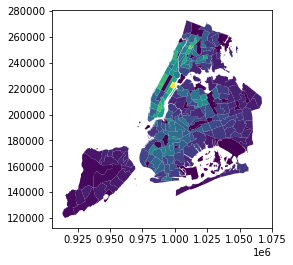

In [82]:
# plotting a choropleth map on the column 'density (pop/sq_mi)'
nta_pop.plot(column='density (pop/sq_mi)')



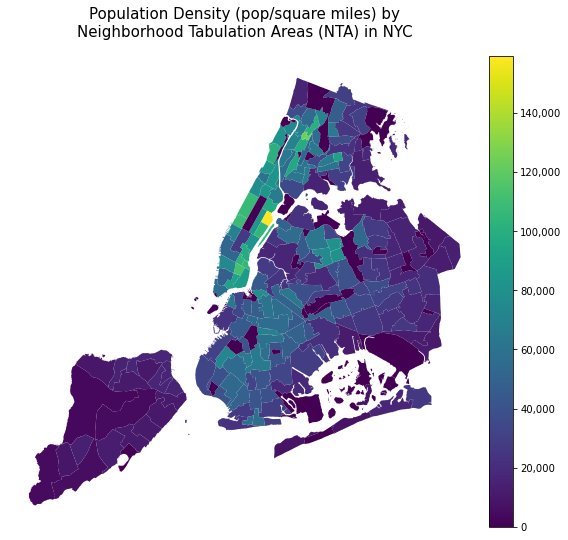

In [84]:
fig, ax = plt.subplots(figsize=(8,8))

# saving variable to format integers as strings with commas
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

# resizing the color bar to scale to the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# plotting 'density (pop/sq_mi)' as a choropleth map
nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, # plotting on the generated axis
    cax=cax, # legend of the color bar
    legend=True, # turning on legend
    legend_kwds={'format':comma_fmt}
)

# setting title
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15,
    pad=20
)

ax.axis('off')
plt.tight_layout()



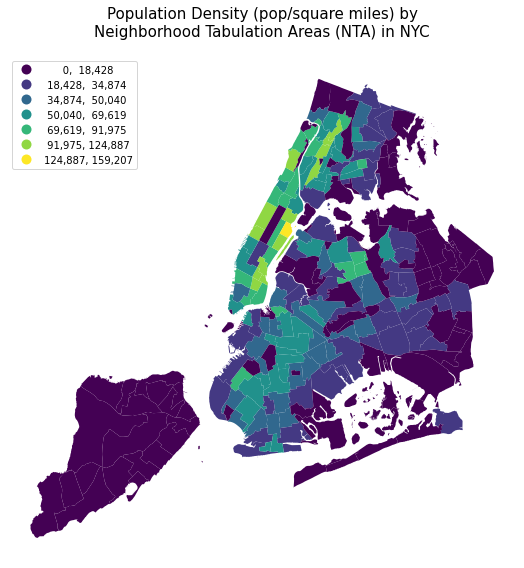

In [86]:
fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={'loc': "upper left", 
                 'fmt': "{:,.0f}",
                 'fontsize': "10"}
)     
        
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, 
    pad=20
)

plt.axis('off')
plt.tight_layout()

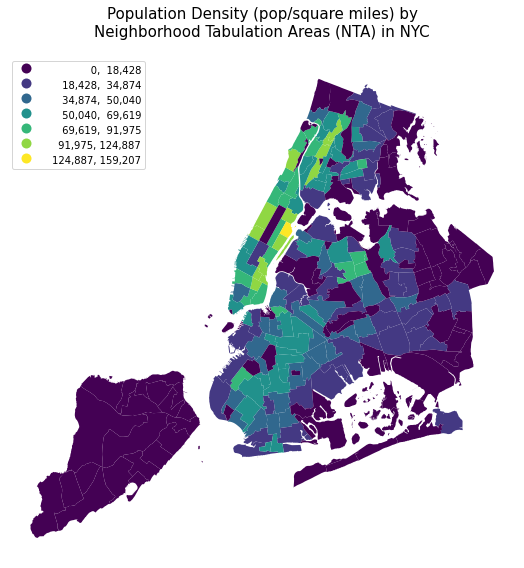

In [87]:
# align legend numbers

fig, ax = plt.subplots(figsize=(8, 8))

nta_pop.plot(
    column='density (pop/sq_mi)', 
    ax=ax, 
    legend=True, 
    scheme='fisher_jenks',
    k=7,
    legend_kwds={'loc': "upper left", 
                 'fmt': "{:,.0f}",
                 'fontsize': "10"}
)

# returning the legend
leg = ax.get_legend()

# making the legend labels right horizontal aligned
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(125)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"     
        
ax.set_title(
    'Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
    fontsize=15, pad=20
)

plt.axis('off')
plt.tight_layout()

# Saving the plot as a JPEG image
plt.savefig('data/choropleth_map.jpg', format='jpeg', dpi=300)

## Hexbin Map

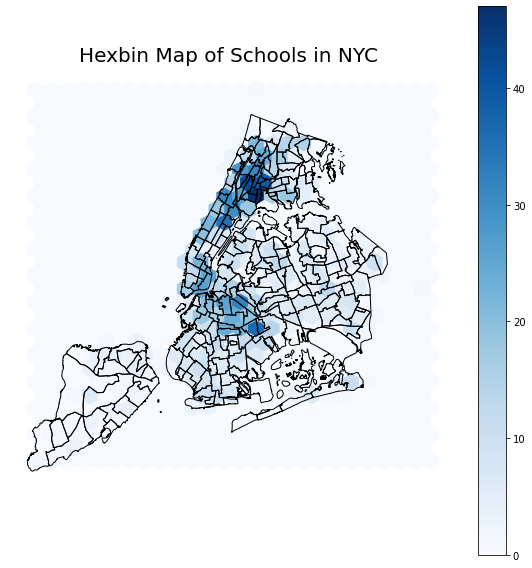

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))

school_points['x'] = school_points['geometry'].x
school_points['y'] = school_points['geometry'].y
df = pd.DataFrame(school_points)

df.plot.hexbin(
    x='x', 
    y='y', 
    gridsize=25, 
    ax=ax,
    cmap='Blues'
)


(nta_shape
 .to_crs(epsg=2263)
 .plot(
     ax=ax, 
     color='None', 
     edgecolor='black')
 )

ax.set_title('Hexbin Map of Schools in NYC', fontsize=20, pad=10)
plt.axis('off')
fig.tight_layout()

# Save the plot as a JPEG image
plt.savefig('data/hexbin_map.jpg', format='jpeg', dpi=300)